Import used packages

In [1]:
from algorithms import *
import numpy as np
from sklearn.cluster import KMeans


In [2]:
# Define both data paths
circle_path = 'Circle.csv'
spiral_path = 'Spiral.csv'

# Load the Circle data set
data_circle = np.loadtxt(circle_path, delimiter=',')
X_circle = data_circle[:, :2]

# Load the Spiral data set
data_spiral = np.loadtxt(spiral_path, delimiter=',')
X_spiral = data_spiral[:, :2]
labels_spiral = data_spiral[:, 2]

Plot Datasets

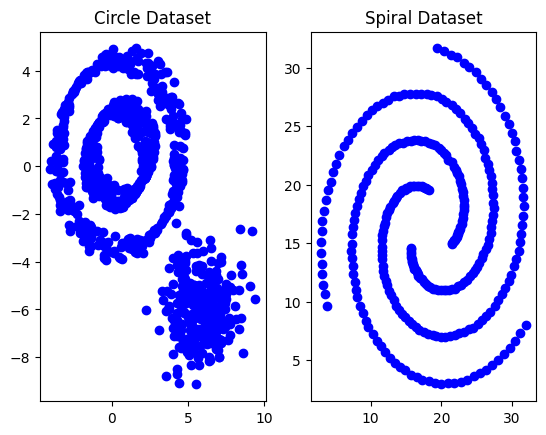

In [3]:
plot_datasets(X_circle, 'Circle Dataset', X_spiral, 'Spiral Dataset' )

Define Global Variables

In [4]:
sigma = 1
k = 10

Construct Similarity Graph for both Circle and Spiral

In [5]:
# Try several values of k = 10, 20, 40. Use σ = 1
W_circle = construct_similarity_graph(X_circle, k=k, sigma=sigma)
W_spiral = construct_similarity_graph(X_spiral, k=k, sigma=sigma)

W_spiral


array([[0.        , 0.58786967, 0.13945686, ..., 0.        , 0.        ,
        0.        ],
       [0.58786967, 0.        , 0.6336554 , ..., 0.        , 0.        ,
        0.        ],
       [0.13945686, 0.6336554 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.96923323,
        0.94058806],
       [0.        , 0.        , 0.        , ..., 0.96923323, 0.        ,
        0.99501248],
       [0.        , 0.        , 0.        , ..., 0.94058806, 0.99501248,
        0.        ]])

Compute Percentage of non-zero elements:

In [6]:
c_percentage = percentage_nonzero(W_circle)
s_percentage = percentage_nonzero(W_spiral)

print("Percentage of non-zero elements (Circle): {:.2f}%".format(c_percentage))
print("Percentage of non-zero elements (Spiral): {:.2f}%".format(s_percentage))


Percentage of non-zero elements (Circle): 1.31%
Percentage of non-zero elements (Spiral): 3.46%


Compute Degree matrix D and the Laplacian matrix L = D − W (sparse format storage)

In [7]:
# Laplacian for Circle
L_circle_sparse, D_circle_sparse, W_circle_sparse = construct_laplacian(W_circle)

# Laplacian for Spiral
L_spiral_sparse, D_spiral_sparse, W_spiral_sparse = construct_laplacian(W_spiral)

Compute the number of connected components of the similarity graph

In [8]:
# Compute number of connected components for Circle
circle_num_components = compute_num_components(L_circle_sparse)
print("Number of connected components (Circle): ", circle_num_components)

# Compute number of connected components for Spiral
spiral_num_components = compute_num_components(L_spiral_sparse)
print("Number of connected components (Spiral): ", spiral_num_components)

Number of connected components (Circle):  2
Number of connected components (Spiral):  1


###### If the number of connected components is equal to 1, it indicates that the graph is fully connected, and all its vertices are interconnected.

 Compute some small eigenvalues of L and use their values to choose a
suitable number of clusters M for the points data-sets

Number of clusters for Circle using Arnoldi algorithm: 3


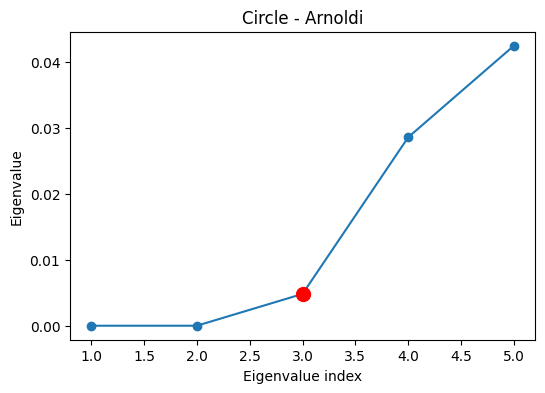

Number of clusters for Spiral using Arnoldi algorithm: 3


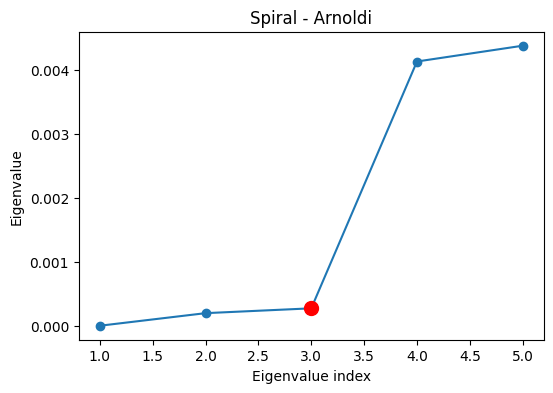

In [9]:
circle_eigvals, circle_eigvecs, circle_sorted_eigvals = compute_eigen(L_circle_sparse, k = 5)
circle_num_clusters = num_cluster(circle_sorted_eigvals, k=5,title='Circle' )
spiral_eigvals, spiral_eigvecs, spiral_sorted_eigvals = compute_eigen(L_spiral_sparse, k=5)
spiral_num_clusters = num_cluster(spiral_sorted_eigvals, k=5, title='Spiral' )


###### In general, power iteration and Lanczos methods are iterative methods that can converge slowly or not at all for certain matrices, particularly for matrices with multiple eigenvalues close to each other or with a wide range of eigenvalues. On the other hand, shift-invert and implicitly restarted Arnoldi methods are often more robust and better suited for sparse matrices with non-uniform eigenvalue distribution.

Exercise 5- Compute the M eigenvectors u1, ..., uM ∈ RN that correspond to the M smallest eigenvalues of the Laplacian matrix, and define the matrix U ∈ R N×M with these vectors as columns.

In [10]:
circle_eigvals, circle_eigvecs, circle_sorted_eigvals = compute_eigen(L_circle_sparse, k = circle_num_clusters)
spiral_eigvals, spiral_eigvecs, spiral_sorted_eigvals = compute_eigen(L_spiral_sparse, k=spiral_num_clusters)

# Define the matrix Circle_U with the eigenvectors of L_circle_sparse as columns
circle_U = np.stack([circle_eigvecs[:, i] for i in range(circle_num_clusters)], axis=1)

# Define the matrix Spiral_U with the eigenvectors of L_spiral_sparse as columns
spiral_U = np.stack([spiral_eigvecs[:, i] for i in range(spiral_num_clusters)], axis=1)

Exercise 6- k-means algorithm

In [11]:
# Circle
# Cluster the points yi in RM with the k-means algorithm into clusters C1, ..., CM
Circle_kmeans = KMeans(n_clusters=circle_num_clusters, n_init=10, random_state=0)
y_Circle_kmeans = Circle_kmeans.fit_predict(circle_U)

# Spiral
# Cluster the points yi in RM with the k-means algorithm into clusters C1, ..., CM
Spiral_kmeans = KMeans(n_clusters=spiral_num_clusters, n_init=10, random_state=0)
y_Spiral_kmeans = Spiral_kmeans.fit_predict(spiral_U)

Exercises 7- Assign the original points in X to the same clusters as their corresponding
rows in U and construct the clusters 

In [12]:
# Circle
# Assign the original points in X to the same clusters as their corresponding rows in U
C = []
for i in range(circle_num_clusters):
    C.append(X_circle[y_Circle_kmeans == i])

# Spiral
# Assign the original points in X to the same clusters as their corresponding rows in U
S = []
for i in range(spiral_num_clusters):
    S.append(X_spiral[y_Spiral_kmeans == i])

###### In here we set the number of clusters to the values extracted before, and use the "k-means++" initialization method, which can lead to better results than random initialization. We also set the maximum number of iterations to 300, and the number of times the k-means algorithm will be run with different centroid seeds to 10. The fit_predict method is used to compute cluster centers and predict the closest cluster each point in U belongs to. The resulting clusters are stored in the clusters variable.

Exercise 8- Plot the clusters of points X with different colors.

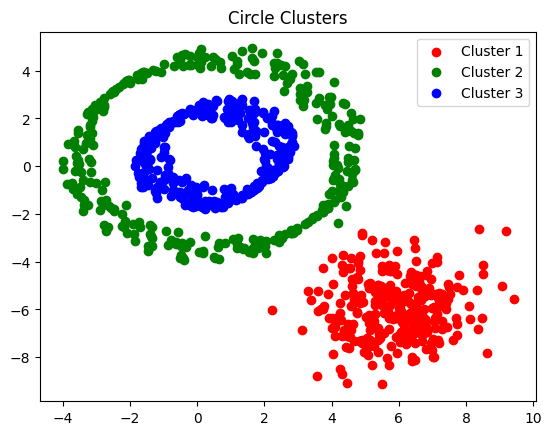

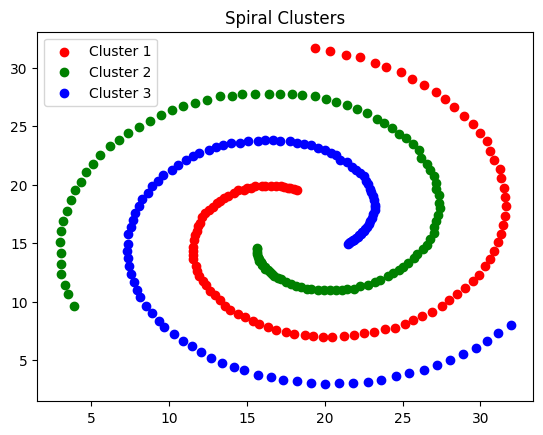

In [13]:
# Plot Circle Clusters
plot_clustering(C,circle_num_clusters,'Circle Clusters')

# Plot Spiral Clusters
plot_clustering(S,spiral_num_clusters, 'Spiral Clusters')

Exercise 9- Compute the clusters for the same set of points with other clustering
methods 

Using Agglomerative Clustering

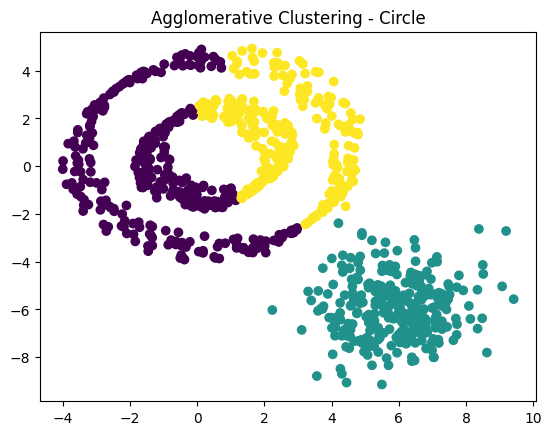

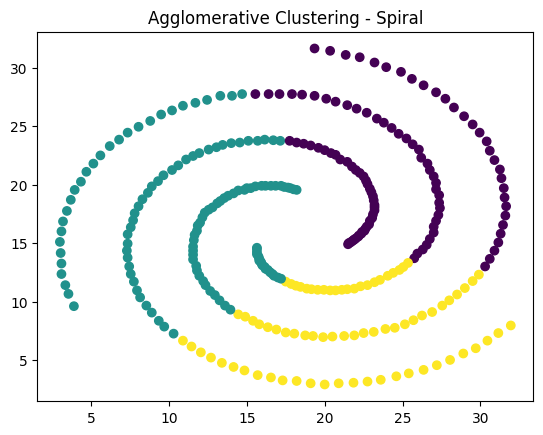

In [14]:
# Apply agglomerative clustering to circle data
circle_agg = agglomerative_clustering(X_circle, 3, 'Agglomerative Clustering - Circle')

# Apply agglomerative clustering to spiral data
spiral_agg = agglomerative_clustering(X_spiral, 3, "Agglomerative Clustering - Spiral")